In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Fri Jan 27 07:07:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# MLP

In [ ]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# Configuration options
feature_vector_length = 28 * 28
num_classes = 10


# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28  pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)



# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

import time
start_time = time.time()


history = model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

print()
print("--- %s seconds ---" % (time.time() - start_time))

# model.fit(X_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Feature shape: (784,)
Epoch 1/50
844/844 [==============================] - 11s 8ms/step - loss: 0.4993 - accuracy: 0.8235 - val_loss: 0.4000 - val_accuracy: 0.8497
Epoch 2/50
844/844 [==============================] - 5s 6ms/step - loss: 0.3737 - accuracy: 0.8644 - val_loss: 0.3619 - val_accuracy: 0.8670
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 0.3372 - accuracy: 0.8772 - val_loss: 0.3731 - val_accuracy: 0.8595
Epoch 4/50
844/844 [==============================] - 3s 3ms/step - loss: 0.3137 - accuracy: 0.8849 - val_loss: 0.3331 - val_accuracy: 0.8732
Epoch 5/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2946 - accuracy: 0.8912 - val_loss: 0.3389 - val_accuracy: 0.8782
Epoch 6/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2794 - accuracy: 0.8959 - val_loss: 0.3048 - val_accuracy: 0.8850
Epoch 7/50
844/844 [==============================] - 3s 3ms/step - loss: 0.2681 - accuracy: 0.9010 - val_loss: 0.3058 - val_

# CONV2d

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
## MNIST dataset

mnist_bldr = tfds.builder('fashion_mnist')
mnist_bldr.download_and_prepare()
datasets = mnist_bldr.as_dataset(shuffle_files=False)
print(datasets.keys())
mnist_train_orig, mnist_test_orig = datasets['train'], datasets['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteD16QBL/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteD16QBL/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
dict_keys([Split('train'), Split('test')])


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 20

In [ ]:
mnist_train = mnist_train_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

mnist_test = mnist_test_orig.map(
    lambda item: (tf.cast(item['image'], tf.float32)/255.0, 
                  tf.cast(item['label'], tf.int32)))

tf.random.set_seed(1)

mnist_train = mnist_train.shuffle(buffer_size=BUFFER_SIZE,
                                  reshuffle_each_iteration=True)

mnist_valid = mnist_train.take(10000).batch(BATCH_SIZE)
mnist_train = mnist_train.skip(10000).batch(BATCH_SIZE)

## Constructing a CNN in Keras

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
    
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

In [ ]:
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 7, 7, 64])

In [ ]:
model.add(tf.keras.layers.Flatten())
    
model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 3136])

In [ ]:
model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

In [ ]:
tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compute_output_shape(input_shape=(16, 28, 28, 1))

TensorShape([16, 10])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              3212288   
                                                                 
 dropout (Dropout)           (None, 1024)             

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(mnist_train, epochs=NUM_EPOCHS, 
                    validation_data=mnist_valid, 
                    shuffle=True)

Epoch 1/20
782/782 [==============================] - 15s 10ms/step - loss: 0.4512 - accuracy: 0.8366 - val_loss: 0.2930 - val_accuracy: 0.8937
Epoch 2/20
782/782 [==============================] - 7s 8ms/step - loss: 0.2918 - accuracy: 0.8929 - val_loss: 0.2560 - val_accuracy: 0.9039
Epoch 3/20
782/782 [==============================] - 7s 8ms/step - loss: 0.2474 - accuracy: 0.9090 - val_loss: 0.2204 - val_accuracy: 0.9176
Epoch 4/20
782/782 [==============================] - 10s 10ms/step - loss: 0.2184 - accuracy: 0.9186 - val_loss: 0.2069 - val_accuracy: 0.9223
Epoch 5/20
782/782 [==============================] - 10s 11ms/step - loss: 0.1976 - accuracy: 0.9263 - val_loss: 0.2066 - val_accuracy: 0.9265
Epoch 6/20
782/782 [==============================] - 9s 10ms/step - loss: 0.1773 - accuracy: 0.9334 - val_loss: 0.1943 - val_accuracy: 0.9286
Epoch 7/20
782/782 [==============================] - 9s 11ms/step - loss: 0.1572 - accuracy: 0.9418 - val_loss: 0.1636 - val_accuracy: 0.939

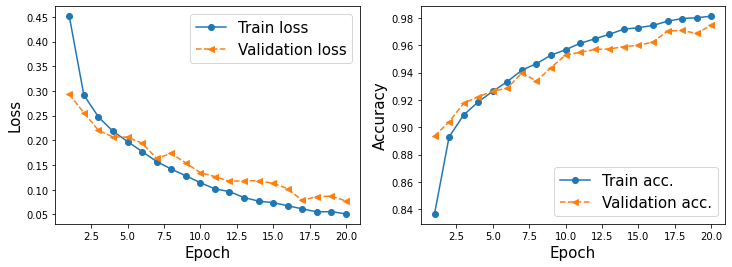

In [ ]:
import numpy as np
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [ ]:
test_results = model.evaluate(mnist_test.batch(20))
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

500/500 [==============================] - 2s 4ms/step - loss: 0.3833 - accuracy: 0.9198

Test Acc. 91.98%


TensorShape([12, 10])
tf.Tensor([4 6 9 7 5 1 0 5 7 4 0 8], shape=(12,), dtype=int64)


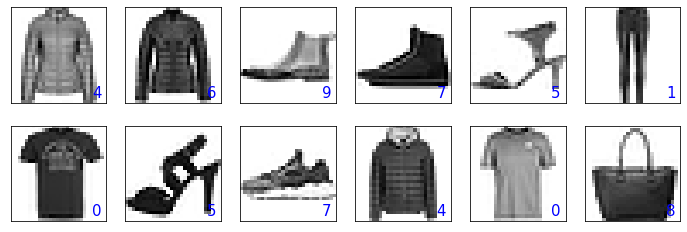

In [91]:
batch_test = next(iter(mnist_test.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
#plt.savefig('figures/15_13.png', dpi=300)
plt.show()

In [ ]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [204]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)



# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


num_classes = 10

# Convert target classes to categorical ones
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


# Create the model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    data_format='channels_last',
    name='conv_1', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), name='pool_1'))
    
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5),
    strides=(1, 1), padding='same',
    name='conv_2', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))

model.compute_output_shape(input_shape=(16, 28, 28, 1))

model.add(tf.keras.layers.Flatten())
    
model.compute_output_shape(input_shape=(16, 28, 28, 1))

model.add(tf.keras.layers.Dense(
    units=1024, name='fc_1', 
    activation='relu'))

model.add(tf.keras.layers.Dropout(
    rate=0.5))
    
model.add(tf.keras.layers.Dense(
    units=10, name='fc_2',
    activation='softmax'))

tf.random.set_seed(1)
model.build(input_shape=(None, 28, 28, 1))

model.compute_output_shape(input_shape=(16, 28, 28, 1))




# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

import time
start_time = time.time()


history = model.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split=0.1)

print()
print("--- %s seconds ---" % (time.time() - start_time))

# model.fit(X_train, y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Epoch 1/50
844/844 [==============================] - 5s 6ms/step - loss: 0.4421 - accuracy: 0.8405 - val_loss: 0.2924 - val_accuracy: 0.8915
Epoch 2/50
844/844 [==============================] - 4s 5ms/step - loss: 0.2842 - accuracy: 0.8961 - val_loss: 0.2561 - val_accuracy: 0.9032
Epoch 3/50
844/844 [==============================] - 4s 5ms/step - loss: 0.2400 - accuracy: 0.9108 - val_loss: 0.2438 - val_accuracy: 0.9113
Epoch 4/50
844/844 [==============================] - 4s 5ms/step - loss: 0.2105 - accuracy: 0.9221 - val_loss: 0.2368 - val_accuracy: 0.9150
Epoch 5/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1833 - accuracy: 0.9315 - val_loss: 0.2241 - val_accuracy: 0.9202
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1632 - accuracy: 0.9384 - val_loss: 0.2199 - val_accuracy: 0.9212
Epoch 7/50
844/844 [==============================] - 4s 5ms/step - loss: 0.1450 - accuracy: 0.9451 - val_loss: 0.2286 - val_accuracy: 0.9203
Epoch 

In [205]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        51264     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 1024)              3212288   
                                                                 
 dropout_4 (Dropout)         (None, 1024)             

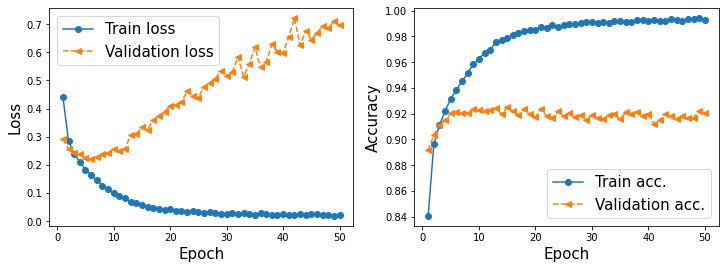

In [206]:
import numpy as np
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [207]:
import numpy as np
y_real = np.argmax(y_test , axis=1)
y_pred = tf.argmax(model(X_test), axis=1).numpy()

## 2 sample of each object

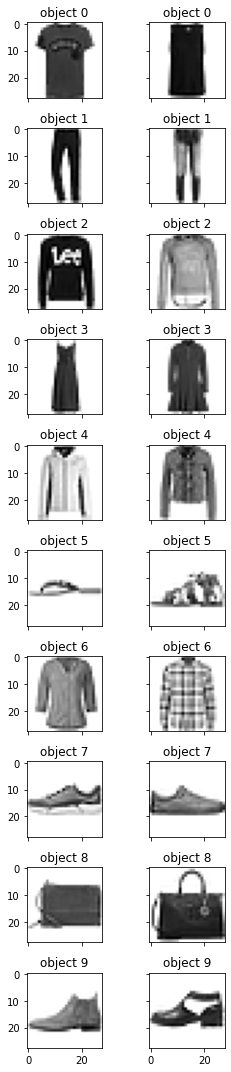

In [208]:
fig, ax = plt.subplots(10, 2, sharex='col', sharey='row', figsize = (4,15))
for obj in np.unique(y_real):
  # print(obj)
  indices = np.where(y_real==obj)[0][:2]

  img1= X_test[indices[0]]
  ax[obj , 0].imshow(img1, cmap='gray_r')
  ax[obj , 0].title.set_text(f"object {obj}")

  img2= X_test[indices[1]]
  ax[obj , 1].imshow(img2, cmap='gray_r')
  ax[obj , 1].title.set_text(f"object {obj}")
plt.tight_layout()
plt.show()

In [209]:
wrong_pred = np.where(y_pred != y_real)
len(wrong_pred[0])

816

## Wrong predicted

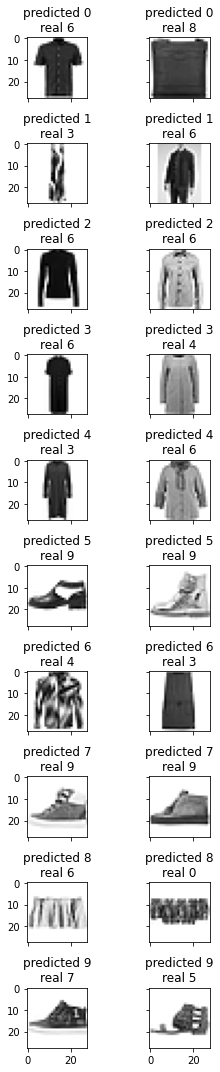

In [210]:
fig, ax = plt.subplots(10, 2, sharex='col', sharey='row', figsize = (4,15))
for obj in np.unique(y_real):
  # print(obj)
  ind_obj = np.where(y_pred==obj)[0]
  wrong_ind = np.where(y_real[ind_obj]!=obj)
  indices = ind_obj[wrong_ind][:2]
  # print(indices)

  img1= X_test[indices[0]]
  ax[obj , 0].imshow(img1, cmap='gray_r')
  ax[obj , 0].title.set_text(f"predicted {obj}\nreal {y_real[indices[0]]}")

  img2= X_test[indices[1]]
  ax[obj , 1].imshow(img2, cmap='gray_r')
  ax[obj , 1].title.set_text(f"predicted {obj}\nreal {y_real[indices[1]]}")

plt.tight_layout()
plt.show()

In [211]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(12, 4))
# for i in range(12):
#     ax = fig.add_subplot(2, 6, i+1)
#     ax.set_xticks([]); ax.set_yticks([])
#     img = X_test[wrong_pred[0][i]]
#     ax.imshow(img, cmap='gray_r')
#     ax.text(0.9, 0.1, '{}'.format(y_pred[wrong_pred[0][i]]), 
#             size=15, color='blue',
#             horizontalalignment='center',
#             verticalalignment='center', 
#             transform=ax.transAxes)
    
# #plt.savefig('figures/15_13.png', dpi=300)
# plt.show()

In [212]:
# print("real class    predicted class")
# for i in range(12):
#   print( "    "  ,y_real[wrong_pred[0][i]] , "          "  ,y_pred[wrong_pred[0][i]])

## precision , recall , f1_score , confusion matrix

### Optimizing the precision and recall of a classification model 

Both the prediction error (ERR) and accuracy (ACC) provide general information about how many examples\n are misclassified. The error can be understood as the sum of all false predictions divided by the number of total predictions, and the accuracy is calculated as the sum of correct predictions divided by the total number of predictions, respectively:


ERR = (FP +FN)/(FP+FN+TP+TN)

The prediction accuracy can then be calculated directly from the error:

ACC = (TP+FN)/(FP+FN+TP+TN) = 1 - ERR

The true positive rate (TPR) and false positive rate (FPR) are performance metrics that are especially useful for imbalanced class problems:

FPR = FP/N = FP/(FP+TN)

TPR = TP/P = TP/(FN+TP)

In tumor diagnosis, for example, we are more concerned about the detection of malignant tumors in order to help a patient with the appropriate treatment. However, it is also important to decrease the number of benign tumors incorrectly classified as malignant (FP) to not unnecessarily concern patients. In contrast to theFPR, the TPR provides useful information about the fraction of positive (or relevant examples that were correctly identified out of the total pool of positives (P).

The performance metrics precision (PRE) and recall (REC) are related to those TP and TN rates, and in fact, REC is synonymous with TPR:

PRE = TP/(TP+FP)

REC = TPR = TP/P = TP/(FN+TP)

Revisiting the malignant tumor detection example, optimizing for recall helps with minimizing the chance of not detecting a malignant tumor. However, this comes at the cost of predicting malignant tumors in patients although the patients are healthy (a high number of FP). If we optimize for precision, on the other hand, we emphasize correctness if we predict that a patient has a malignant tumor. However, this comes at the cost of missing malignant tumors more frequently (a high number of FN). 

To balance the up- and down-sides of optimizing PRE and REC, often a combination of PRE and REC is used, the so-called F1 score:

F1 = 2(PRE * REC)/(PRE + REC)

In [214]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
print('Precision: %.3f' % precision_score( y_true=y_real, y_pred=y_pred ,  average='macro'))

print('Recall: %.3f' % recall_score(y_true=y_real, y_pred=y_pred ,  average='macro'))

print('F1: %.3f' % f1_score(y_true=y_real, y_pred=y_pred ,  average='macro'))

Precision: 0.918
Recall: 0.918
F1: 0.918


# confusion_matrix

Text(69.0, 0.5, 'True classes')

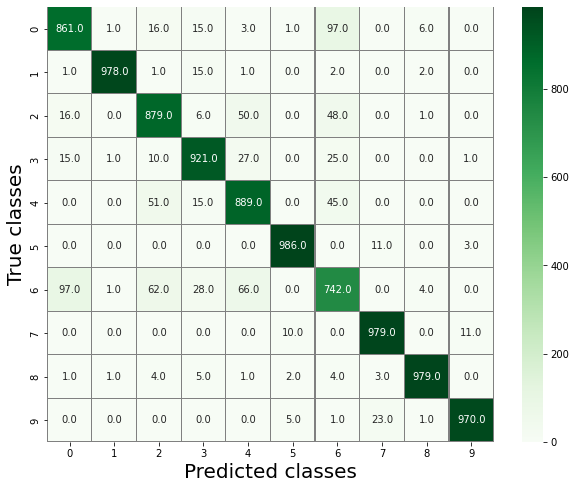

In [215]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = confusion_matrix(y_real, y_pred)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', 
            fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)